# Student Performance Indicator

### Life cycle of machine learning Project
- Understanding the problem statement
- Data Colllection
- Data Checks to perform
- EDA
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as gender, parental_level of education and test preparation course.                                        

### 2) Data Collection
- Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetld=74977

#### 2.1 Import Data & required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### 3. Data Checks to perform
- Check missing values
- Check data types
- Check duplicates
- Check the number of unique values in each column
- Check statistics of data set
- Check various categories in different categorical columns

#### 3.1 Check missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

#### 3.2 Check duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicates

#### 3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values in each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- all means are very close to eachother, between 66 and 69
- all standard deviations are also close, between 14.6 and 15.19
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading = 17

#### 3.6 Check various categories in different categorical columns

In [11]:
print('categories in gender', end=' ')
print(df['gender'].unique())

print('categories in race/ethnicity', end=' ')  
print(df['race/ethnicity'].unique())

print('categories in parental level of education', end=' ')
print(df['parental level of education'].unique())

print('categories in lunch', end=' ')
print(df['lunch'].unique())

print('categories in test preparation course', end=' ')
print(df['test preparation course'].unique())

categories in gender ['female' 'male']
categories in race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch ['standard' 'free/reduced']
categories in test preparation course ['none' 'completed']


In [12]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('There are {} numerical features: {}'.format(len(num_features), num_features))
print('There are {} categorical features: {}'.format(len(cat_features), cat_features))

There are 3 numerical features: ['math score', 'reading score', 'writing score']
There are 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.7 Adding total_score & avg_score

In [13]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg_score'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
full_math = df[df['math score'] == 100]['avg_score'].count()
full_reading = df[df['reading score'] == 100]['avg_score'].count()
full_writing = df[df['writing score'] == 100]['avg_score'].count()

print('Number of students who got full marks in math: {}'.format(full_math))
print('Number of students who got full marks in reading: {}'.format(full_reading))
print('Number of students who got full marks in writing: {}'.format(full_writing))

Number of students who got full marks in math: 7
Number of students who got full marks in reading: 17
Number of students who got full marks in writing: 14


#### Insight
- best performance is in reading, worst in math

### Data Visualization

<Axes: xlabel='avg_score', ylabel='Count'>

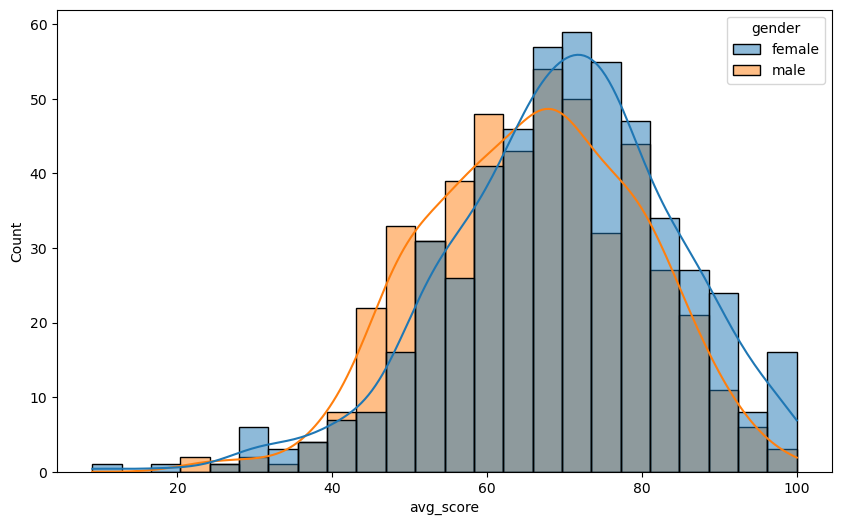

In [15]:
# plotting the histogram & kde plot for avg_score with respect to gender
plt.figure(figsize=(10, 6))
sns.histplot(x=df['avg_score'], kde=True, color='red', hue='gender', data=df)

Text(0.5, 1.0, 'avg_score for male students vs parental level of education')

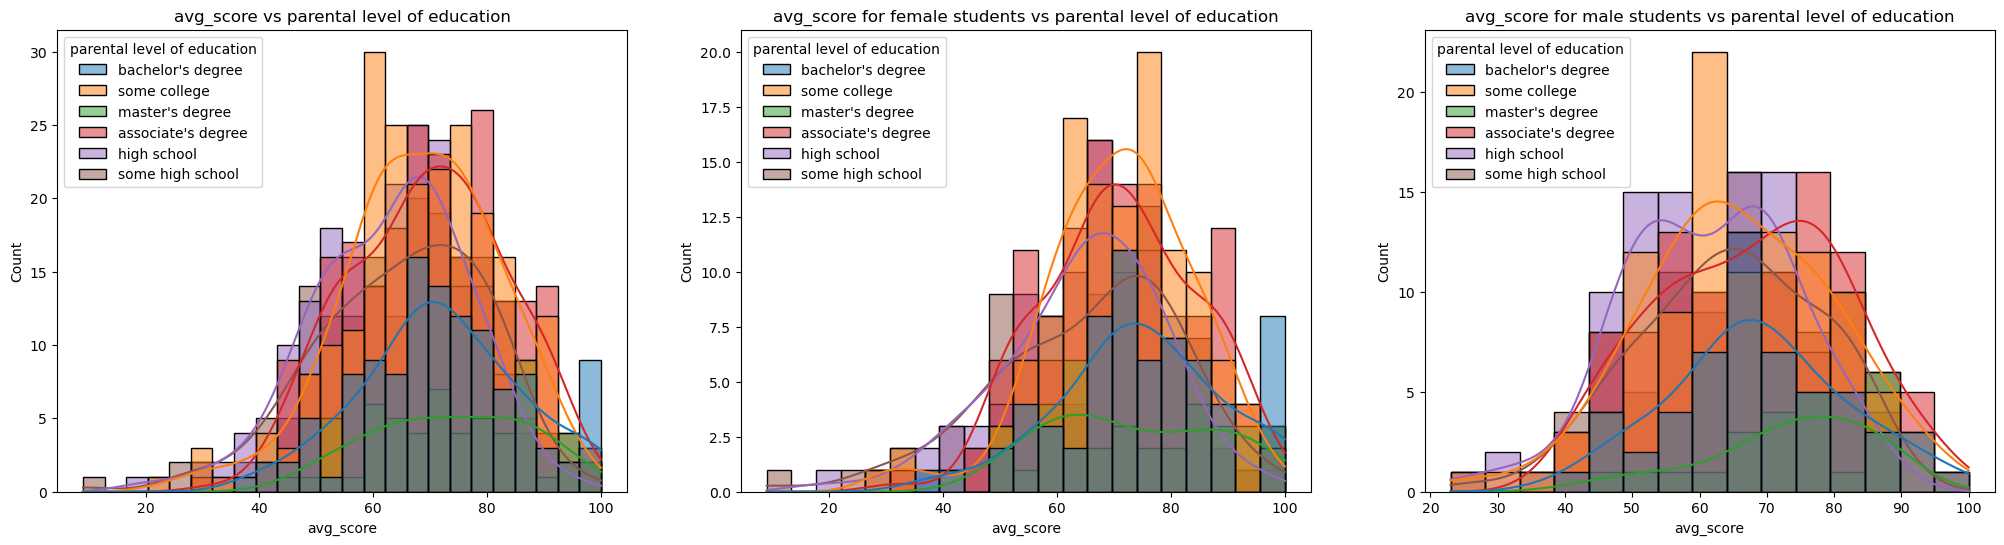

In [54]:
# histogram & kde for avg_score with with respect to parental level of education
fig, ax = plt.subplots(1, 3, figsize=(25, 6))
sns.histplot(x=df['avg_score'], kde=True, color='blue', hue='parental level of education', data=df, ax=ax[0])
ax[0].set_title('avg_score vs parental level of education')

#female students only
sns.histplot(x=df[df['gender'] == 'female']['avg_score'], kde=True, color='blue', hue='parental level of education', data=df, ax=ax[1])
ax[1].set_title('avg_score for female students vs parental level of education')

#male students only
sns.histplot(x=df[df['gender'] == 'male']['avg_score'], kde=True, color='blue', hue='parental level of education', data=df, ax=ax[2])
ax[2].set_title('avg_score for male students vs parental level of education')

#### Insight
- Standard lunch helps students perform well in exams wether male or female

Text(0.5, 1.0, 'avg_score for male students vs parental level of education')

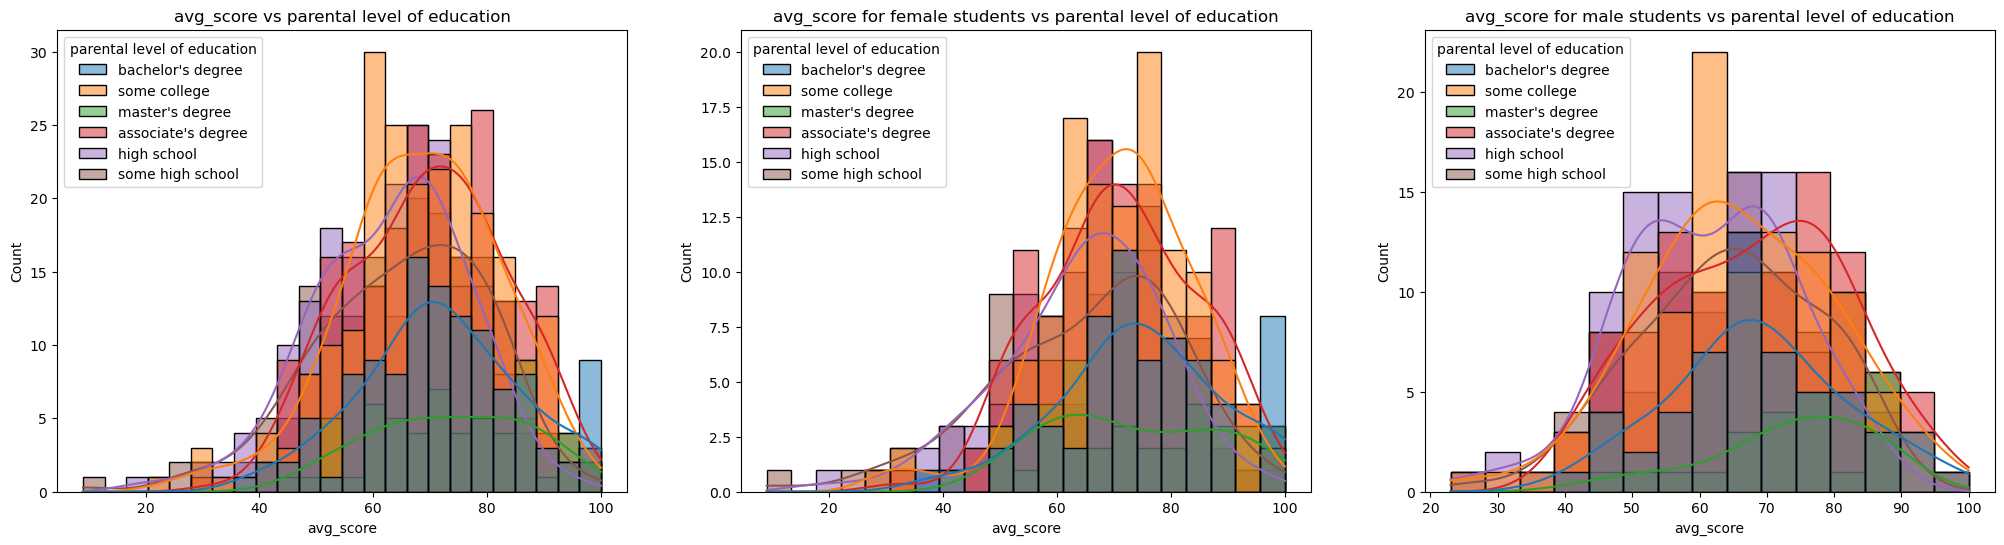

In [17]:
# histogram & kde for avg_score with with respect to parental level of education
fig, ax = plt.subplots(1, 3, figsize=(25, 6))
sns.histplot(x=df['avg_score'], kde=True, color='blue', hue='parental level of education', data=df, ax=ax[0])
ax[0].set_title('avg_score vs parental level of education')

#female students only
sns.histplot(x=df[df['gender'] == 'female']['avg_score'], kde=True, color='blue', hue='parental level of education', data=df, ax=ax[1])
ax[1].set_title('avg_score for female students vs parental level of education')

#male students only
sns.histplot(x=df[df['gender'] == 'male']['avg_score'], kde=True, color='blue', hue='parental level of education', data=df, ax=ax[2])
ax[2].set_title('avg_score for male students vs parental level of education')

#### Insight
- parental level of education doesn't effect the students' scores much in general

Text(0.5, 1.0, 'avg_score for male students vs test preparation course')

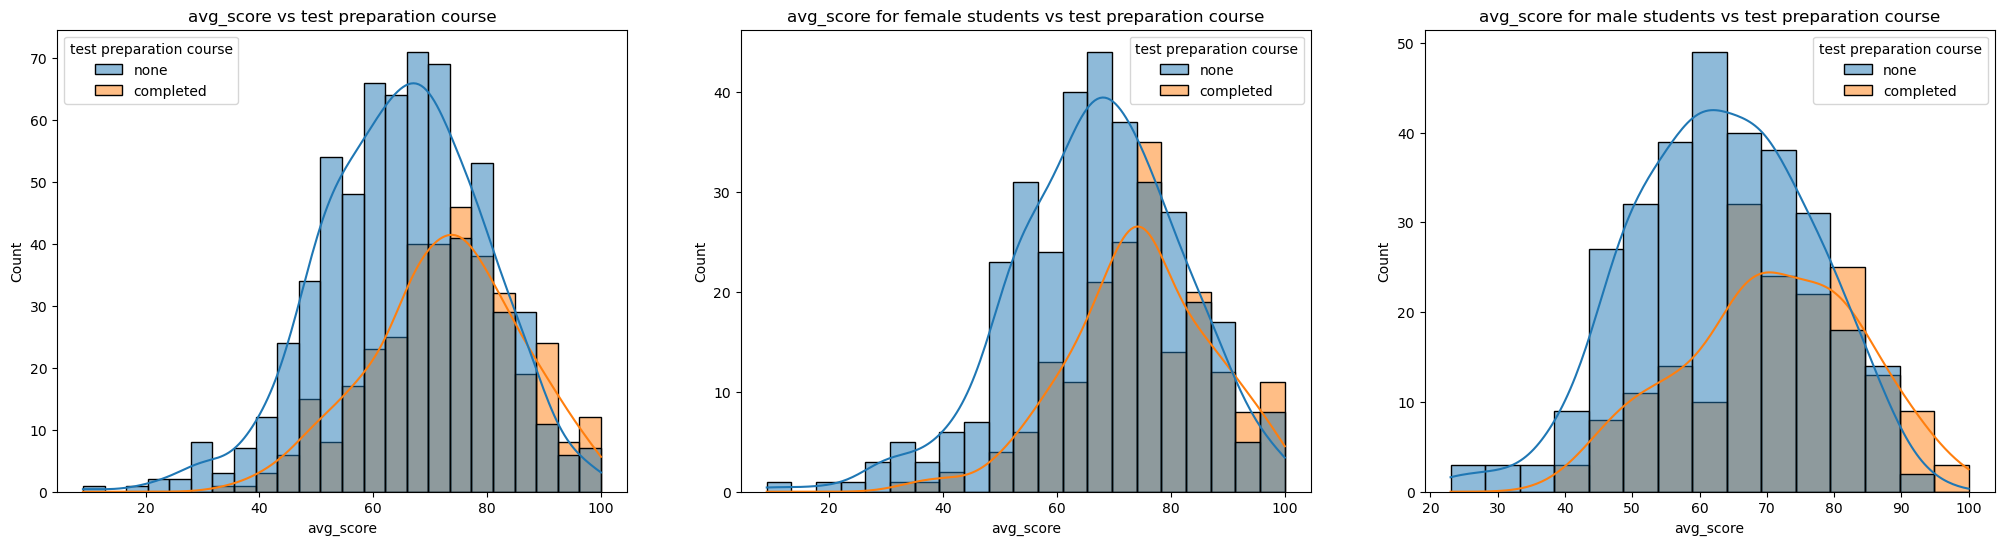

In [18]:
# histogram & kde for avg_score with with respect to test preparation course
fig, ax = plt.subplots(1, 3, figsize=(25, 6))
sns.histplot(x=df['avg_score'], kde=True, color='blue', hue='test preparation course', data=df, ax=ax[0])
ax[0].set_title('avg_score vs test preparation course')

#female students only
sns.histplot(x=df[df['gender'] == 'female']['avg_score'], kde=True, color='blue', hue='test preparation course', data=df, ax=ax[1])
ax[1].set_title('avg_score for female students vs test preparation course')

#male students only
sns.histplot(x=df[df['gender'] == 'male']['avg_score'], kde=True, color='blue', hue='test preparation course', data=df, ax=ax[2])
ax[2].set_title('avg_score for male students vs test preparation course')

#### Insight
- Students who took a test preparation course performed better

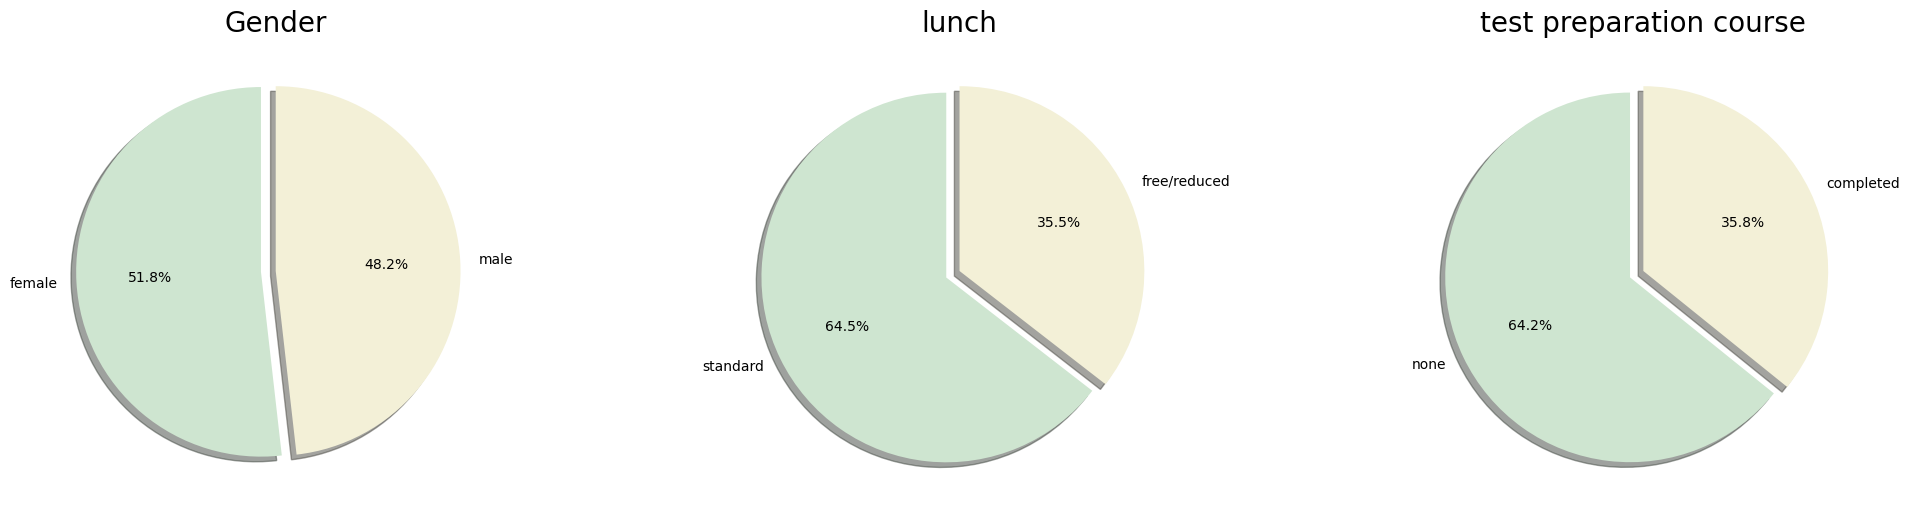

In [19]:
plt.rcParams['figure.figsize'] = (25, 6)

plt.subplot(1, 3, 1)
# piechart for gender
colors = ['#CEE5D0', '#F3F0D7', '#E0C097', '#FF7878', '#F15F79', '#86A789']
#colors = ['#955196', '#dd5182', '#ff6e54', '#ffa600', '#ff7c43', '#ffa600']
genders = df['gender'].value_counts()
plt.pie(genders, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.08, 0), labels=genders.index)
plt.title('Gender', fontsize = 20)

#pie chart for lunch type
plt.subplot(1, 3, 2)
types = df['lunch'].value_counts()
plt.pie(types, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.08, 0), labels=types.index)
plt.title('lunch', fontsize = 20)

#pie chart for test preparation course
plt.subplot(1, 3, 3)
types = df['test preparation course'].value_counts()
plt.pie(types, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.08, 0), labels=types.index)
plt.title('test preparation course', fontsize = 20)
plt.show()

#####  Insight
- Number of Male and Female students is almost equal
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater

In [20]:
#groups = df.groupby('race/ethnicity')['avg_score'].count().sort_values(ascending=False)
groups = df['race/ethnicity'].value_counts().sort_values(ascending=False)
groups

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

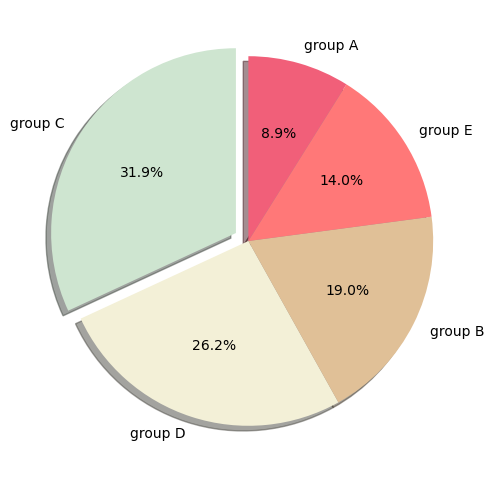

In [21]:
#pie chart for race/ethnicity

plt.figure(figsize=(10, 6))
plt.pie(groups, colors=colors, labels=groups.index, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.08, 0, 0, 0, 0))
plt.show()

#### Insight
- Number of students are greatest in Group C, lowest in group A

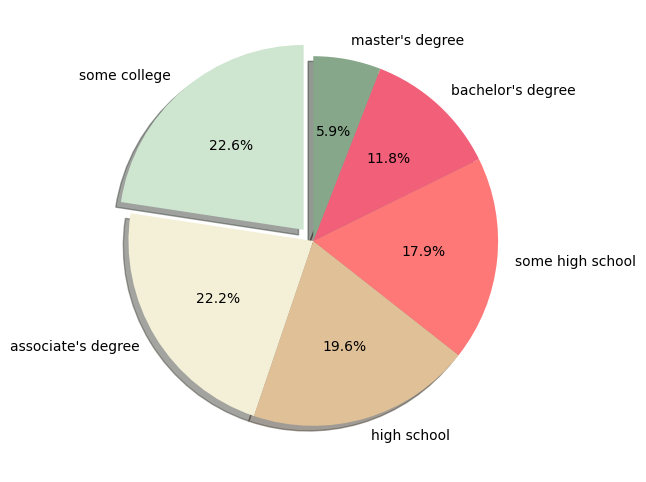

In [22]:
#pie chart for parental level of education
degrees = df['parental level of education'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.pie(degrees, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, labels=degrees.index, explode=(0.08, 0, 0, 0, 0, 0))
plt.show()

#### Insight
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Bivariate Analysis

#### 1. Does gender have any impact on student's performance ?

In [29]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total_score,avg_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


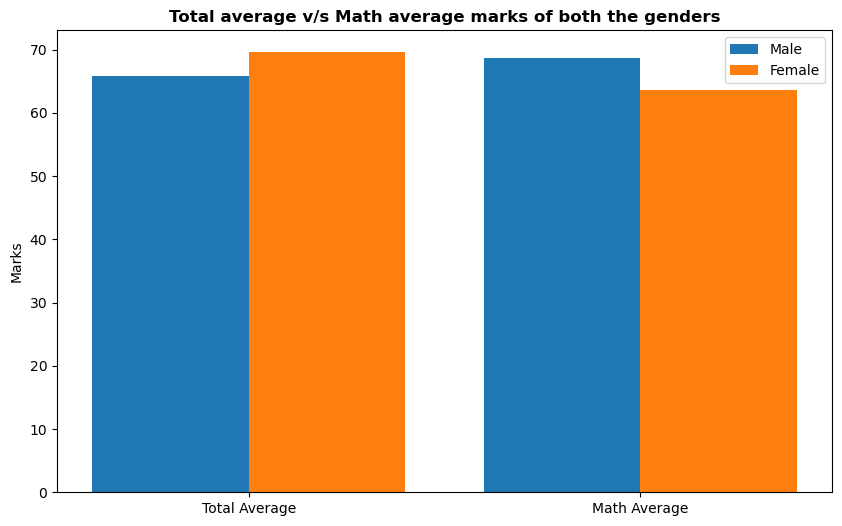

In [35]:
plt.figure(figsize=(10, 6))

X = ['Total Average','Math Average']


female_scores = [gender_group['avg_score'][0], gender_group['math score'][0]]
male_scores = [gender_group['avg_score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insight
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 2. Does race/ethnicity have any impact on student's performance ?

Text(0.5, 1.0, 'Writing score')

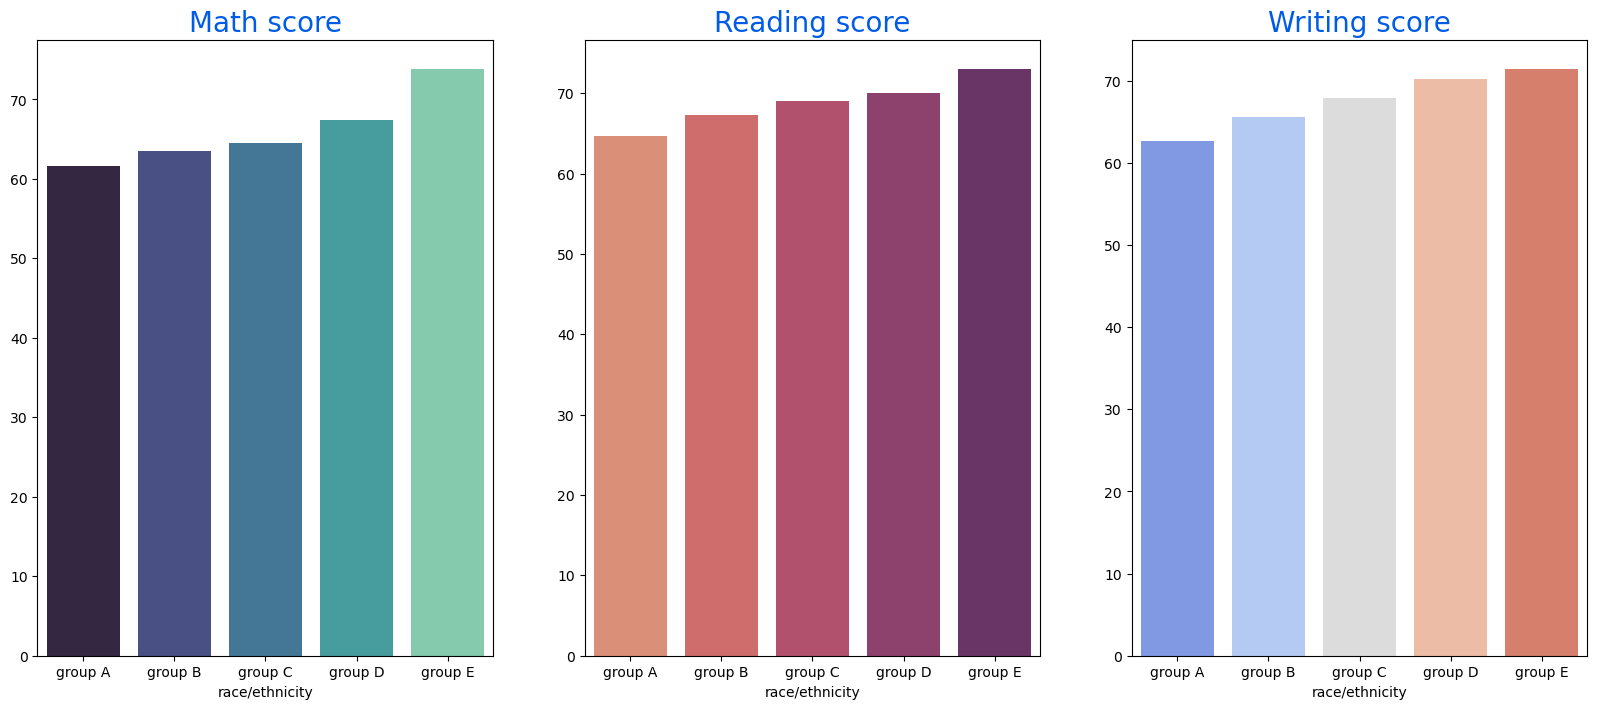

In [46]:
#make 3 subplots one count plot for each average score ['reading score', 'writing score', 'math score'] based on race/ethnicity
race_grouped=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=race_grouped['math score'].mean().index,y=race_grouped['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)


sns.barplot(x=race_grouped['reading score'].mean().index,y=race_grouped['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)


sns.barplot(x=race_grouped['writing score'].mean().index,y=race_grouped['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 

#### 3. Does parental level of education have any impact on student's performance ?

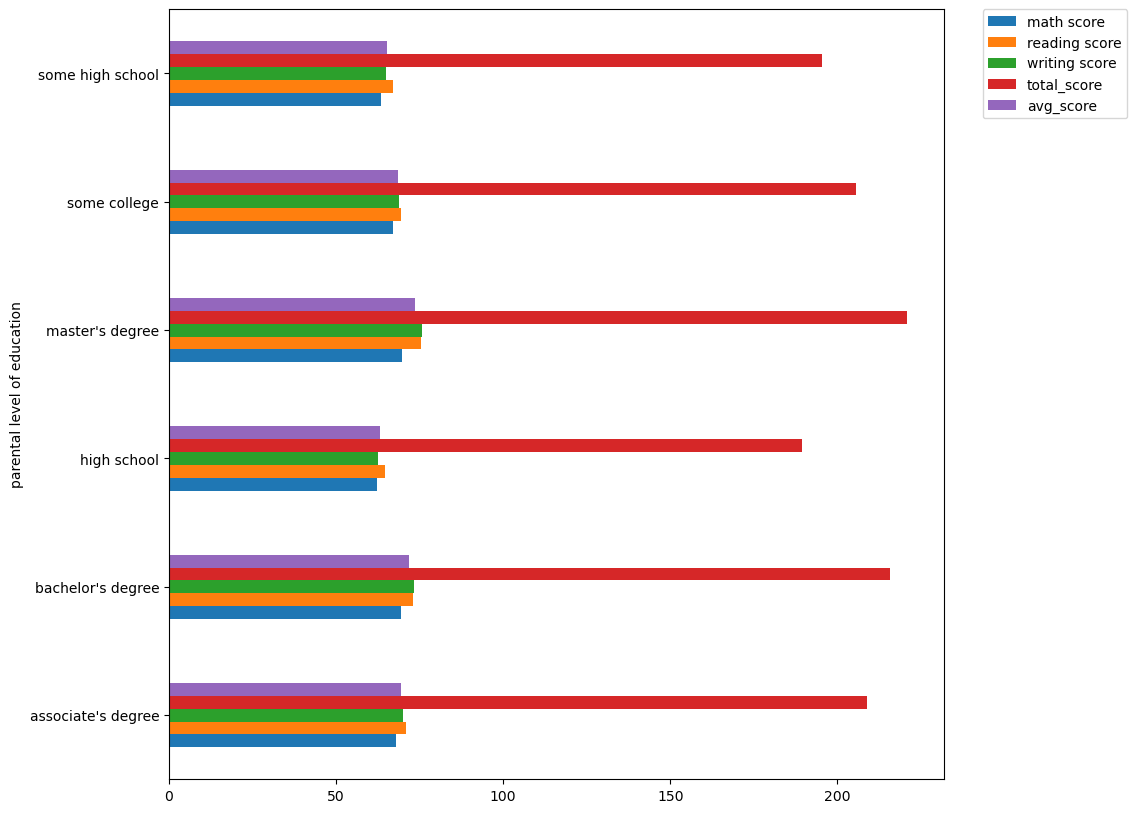

In [48]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
'''
The `agg('mean')` method and the `groupby('parental_level_of_education')` 
operation serve different purposes but are often used together for data aggregation and analysis.

1. `df.groupby('parental_level_of_education')`: 
This operation groups the DataFrame `df` by the unique values in the column `'parental_level_of_education'`. 
It creates separate groups where each group contains rows of data that share the same value in the specified column. 
This operation doesn't compute any summary statistics by default; it simply creates a groupby object that can be used for further aggregation or analysis.

2. `agg('mean')`: This method, when applied to a groupby object, performs an aggregation operation, in this case, 
computing the mean (average) of the numeric columns within each group. 
It calculates the mean separately for each group created by the `groupby` operation and returns a DataFrame where each row corresponds 
to a unique value in the grouping column, and the columns represent the mean values of the numeric columns for each group.

So, combining `df.groupby('parental_level_of_education')` with `agg('mean')` allows you to group your data by the levels of parental education 
and then compute the mean of numeric columns within each group. This is particularly useful for understanding 
how different levels of parental education might correlate with various numeric variables in your dataset.
'''

#### 4. Does lunch type have any impact on student's performance ?

Text(0.5, 1.0, 'Writing score')

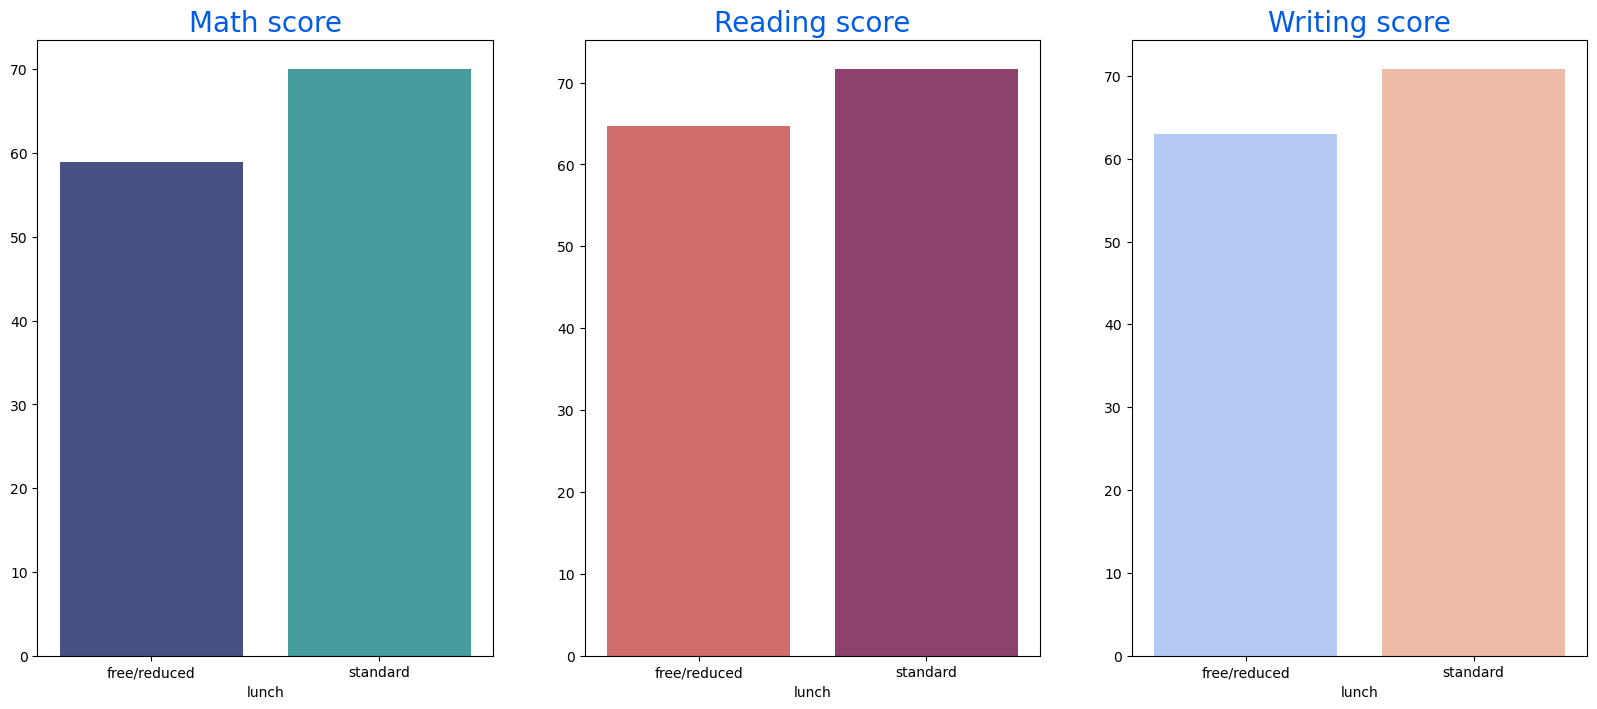

In [53]:
lunch_grouped=df.groupby('lunch')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=lunch_grouped['math score'].mean().index,y=lunch_grouped['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)


sns.barplot(x=lunch_grouped['reading score'].mean().index,y=lunch_grouped['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)


sns.barplot(x=lunch_grouped['writing score'].mean().index,y=lunch_grouped['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### CHECKING OUTLIERS

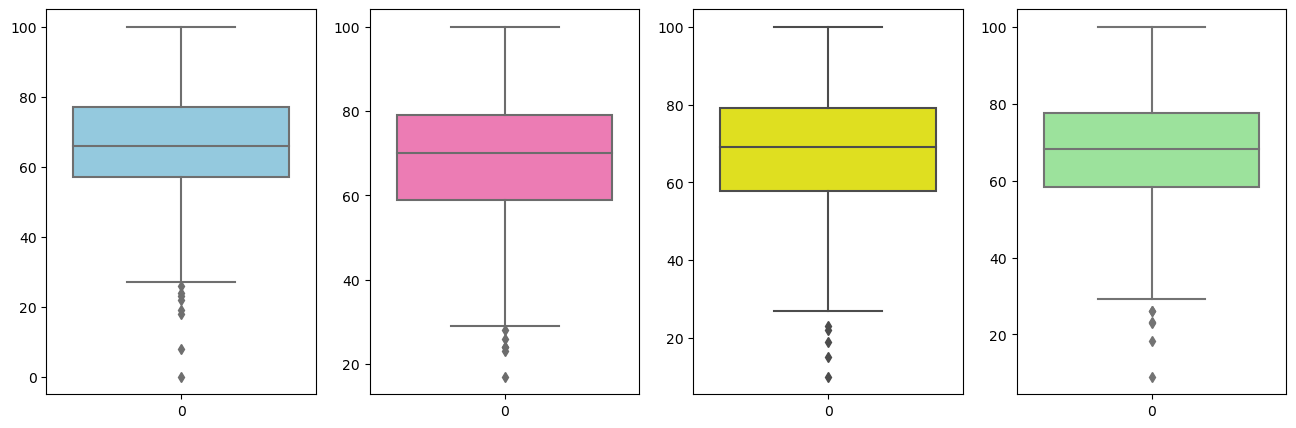

In [57]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

#### Multivariate Analysis

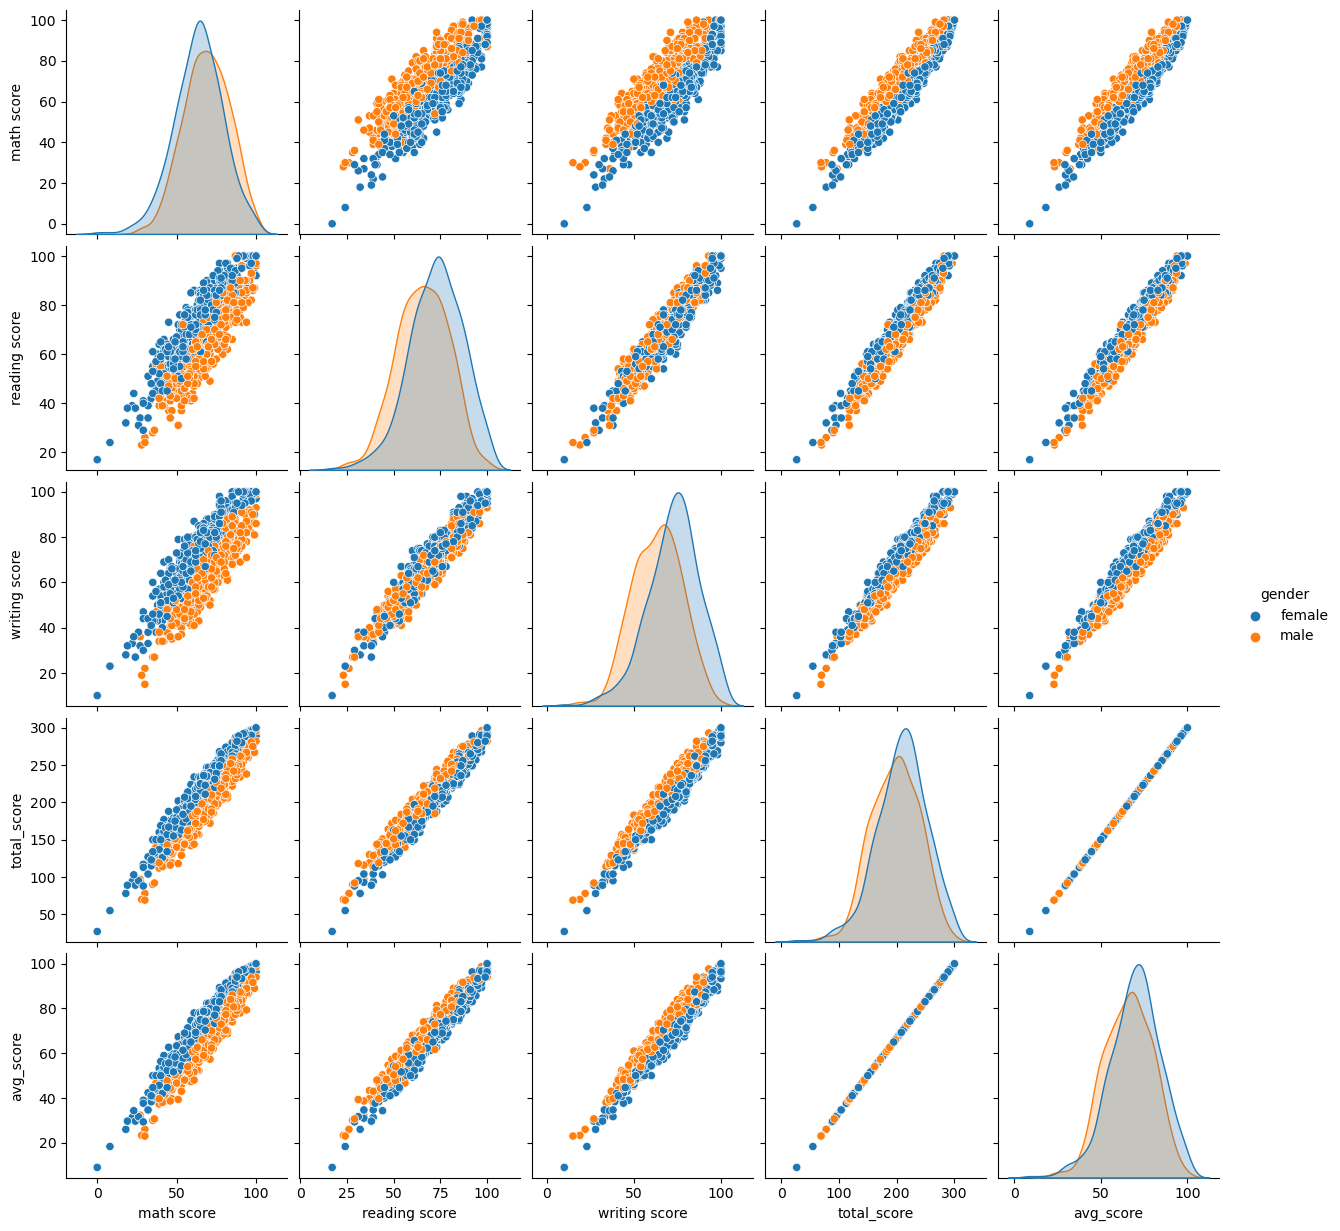

In [28]:
#bivariate analysis using sns pairplot
sns.pairplot(df, hue='gender')
plt.show()

#### Insight
- We can see that all scores increase lineary with each other

### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.